In [1]:
# Generate some data
# TODO: comments

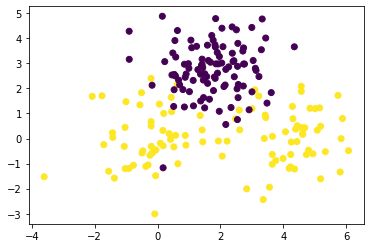

In [84]:
import numpy as np
import pylab as plt
%matplotlib inline

mu1 = [0, 0]
mu2 = [4, 0]
mu3 = [2, 3]
n1 = 50
n2 = 50
n3 = 100

X1 = np.random.multivariate_normal(mu1, np.eye(2), n1)
X2 = np.random.multivariate_normal(mu2, np.eye(2), n2)
X3 = np.random.multivariate_normal(mu3, np.eye(2), n3)

X = np.vstack((X1, X2, X3))

t1 = np.ones((n1, 1))
t2 = np.ones((n2, 1))
t3 = np.zeros((n3, 1))

t = np.vstack((t1, t2, t3))

plt.scatter(X[:, 0], X[:, 1], c=t)

In [85]:
# Augment the Xs
Xe = np.hstack([np.ones((n1 + n2 + n3, 1)), X, X**2])
N, M = Xe.shape
w = np.ones((M, 1)) # initial guess
prior_mu = np.zeros((M, 1))
prior_ss = 1

In [86]:
def grad_function(w,x,t,sig_sq):
    P = 1.0/(1.0 + np.exp(-np.dot(x,w)))
    return (-1.0/sig_sq)*w + np.dot(x.T,t-P)


def hess_function(w,x,t,sig_sq):
    P = 1.0/(1.0 + np.exp(-np.dot(x,w)))
    P = P.flatten() # required for the diagonalisation
    return -(1.0/sig_sq)*np.eye(len(w)) - np.dot(x.T,np.dot(np.diag(P*(1-P)),x))


In [87]:
w = np.zeros((M,1)) # Initial guess
all_w = []
all_w.append(w.flatten())
for it in range(10):
    w = w - np.dot(np.linalg.inv(hess_function(w,Xe,t,prior_ss)),grad_function(w,Xe,t,prior_ss))
    all_w.append(w.flatten())

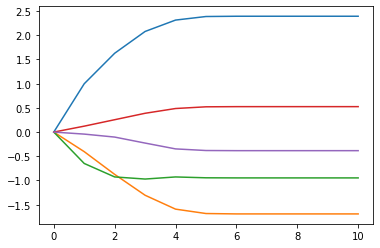

In [88]:
# plot the evolution of the w
plt.plot(all_w)

<a list of 3 text.Text objects>

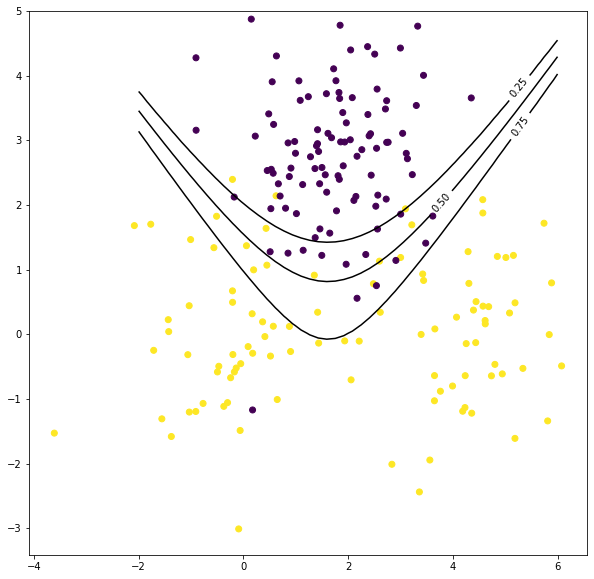

In [97]:
# plot some probability contours
MIN_X = -2
MAX_X = 6
MIN_Y = -2
MAX_Y = 5
n_x = 50
n_y = 60
xv = np.linspace(MIN_X, MAX_X, n_x)
yv = np.linspace(MIN_Y, MAX_Y, n_y)
Xg, Yg = np.meshgrid(xv, yv)
gridX = np.hstack((
    Xg.ravel()[:, None],
    Yg.ravel()[:, None]
))
n_grid, _ = gridX.shape
gridX = np.hstack((np.ones((n_grid,1)), gridX, gridX**2))

probs = 1./(1. + np.exp(-np.dot(gridX, w)))

Z = np.reshape(probs, (n_y, n_x))

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], c=t)
CS = ax.contour(Xg, Yg, Z, levels=[0.25, 0.5, 0.75], colors='k')
ax.clabel(CS, CS.levels, inline=True, fontsize=10)